In [1]:
from models.AE import Autoencoder
AE = Autoencoder(
input_dim=(28,28,1),
encoder_conv_filters=[32,64,64,64],
encoder_conv_kernel_size=[3,3,3,3],
encoder_conv_strides=[1,2,2,1],
decoder_conv_t_filters=[64,64,32,1],
decoder_conv_t_kernel_size=[3,3,3,3],
decoder_conv_t_strides=[1,2,2,1],
z_dim=2
)

W0528 18:15:10.964122 15920 deprecation_wrapper.py:119] From C:\Users\ankit19.gupta\ankit\ankit\ML_Code\GenerativeDeepLearning\myenv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0528 18:15:11.548543 15920 deprecation_wrapper.py:119] From C:\Users\ankit19.gupta\ankit\ankit\ML_Code\GenerativeDeepLearning\myenv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0528 18:15:11.612537 15920 deprecation_wrapper.py:119] From C:\Users\ankit19.gupta\ankit\ankit\ML_Code\GenerativeDeepLearning\myenv\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [2]:
AE.encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
encoder_conv_0 (Conv2D)      (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 7, 7, 64)          0         
__________

In [4]:
AE.decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
__________

In [1]:
import os
from utils.loaders import load_mnist
from models.AE import Autoencoder

Using TensorFlow backend.


In [2]:
SECTION='vae'
RUN_ID='0001'
DATA_NAME='digits'
RUN_FOLDER='run/{}/'.format(SECTION)
RUN_FOLDER='_'.join([RUN_ID,DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER,'viz'))
    os.mkdir(os.path.join(RUN_FOLDER,'images'))
    os.mkdir(os.path.join(RUN_FOLDER,'weights'))
MODE='build'

In [3]:
(x_train,y_train),(x_test,y_test)=load_mnist()

In [4]:
AE= Autoencoder(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 2
)
if MODE=='build':
    AE.save(RUN_FOLDER)
else:
    AE.load_weights(os.path.join(RUN_FOLDER,'weights/weights.h5'))

W0529 12:55:04.922478 18620 deprecation_wrapper.py:119] From C:\Users\ankit19.gupta\ankit\ankit\ML_Code\GenerativeDeepLearning\myenv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0529 12:55:09.989536 18620 deprecation_wrapper.py:119] From C:\Users\ankit19.gupta\ankit\ankit\ML_Code\GenerativeDeepLearning\myenv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0529 12:55:11.324840 18620 deprecation_wrapper.py:119] From C:\Users\ankit19.gupta\ankit\ankit\ML_Code\GenerativeDeepLearning\myenv\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [5]:
AE.encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
encoder_conv_0 (Conv2D)      (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 7, 7, 64)          0         
__________

In [6]:
AE.decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
__________

In [7]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32
INITIAL_EPOCH = 0

In [8]:
AE.compile(LEARNING_RATE)

W0529 12:58:24.777601 18620 deprecation_wrapper.py:119] From C:\Users\ankit19.gupta\ankit\ankit\ML_Code\GenerativeDeepLearning\myenv\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [9]:
RUN_FOLDER

'0001_digits'

In [10]:
AE.train(     
    x_train[:1000]
    , batch_size = BATCH_SIZE
    , epochs = 200
    , run_folder = RUN_FOLDER
    , initial_epoch = INITIAL_EPOCH
)

W0529 13:00:04.730001 18620 deprecation_wrapper.py:119] From C:\Users\ankit19.gupta\ankit\ankit\ML_Code\GenerativeDeepLearning\myenv\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0529 13:00:05.074983 18620 deprecation_wrapper.py:119] From C:\Users\ankit19.gupta\ankit\ankit\ML_Code\GenerativeDeepLearning\myenv\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/200
 160/1000 [===>..........................] - ETA: 46s - loss: 0.2302

C:\Users\ankit19.gupta\ankit\ankit\ML_Code\GenerativeDeepLearning\myenv\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.821582). Check your callbacks.
  % delta_t_median)


1000/1000 [==============================] - 10s 10ms/step - loss: 0.1782

Epoch 00001: saving model to 0001_digits\weights/weights.h5
Epoch 2/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0888

Epoch 00002: saving model to 0001_digits\weights/weights.h5
Epoch 3/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0687

Epoch 00003: saving model to 0001_digits\weights/weights.h5
Epoch 4/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0644

Epoch 00004: saving model to 0001_digits\weights/weights.h5
Epoch 5/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0592

Epoch 00005: saving model to 0001_digits\weights/weights.h5
Epoch 6/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0570

Epoch 00006: saving model to 0001_digits\weights/weights.h5
Epoch 7/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0558

Epoch 00007: saving model to 0001_digits\weights/weight

Epoch 57/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0427

Epoch 00057: saving model to 0001_digits\weights/weights.h5
Epoch 58/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0422

Epoch 00058: saving model to 0001_digits\weights/weights.h5
Epoch 59/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0421

Epoch 00059: saving model to 0001_digits\weights/weights.h5
Epoch 60/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0421

Epoch 00060: saving model to 0001_digits\weights/weights.h5
Epoch 61/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0422

Epoch 00061: saving model to 0001_digits\weights/weights.h5
Epoch 62/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0421

Epoch 00062: saving model to 0001_digits\weights/weights.h5
Epoch 63/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0418

Epoch 00063: saving model to 0001_digi

Epoch 113/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0373

Epoch 00113: saving model to 0001_digits\weights/weights.h5
Epoch 114/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0372

Epoch 00114: saving model to 0001_digits\weights/weights.h5
Epoch 115/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0379

Epoch 00115: saving model to 0001_digits\weights/weights.h5
Epoch 116/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0378

Epoch 00116: saving model to 0001_digits\weights/weights.h5
Epoch 117/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0377

Epoch 00117: saving model to 0001_digits\weights/weights.h5
Epoch 118/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0382

Epoch 00118: saving model to 0001_digits\weights/weights.h5
Epoch 119/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0378

Epoch 00119: saving model to 00

1000/1000 [==============================] - 2s 2ms/step - loss: 0.0353

Epoch 00168: saving model to 0001_digits\weights/weights.h5
Epoch 169/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0354

Epoch 00169: saving model to 0001_digits\weights/weights.h5
Epoch 170/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0359

Epoch 00170: saving model to 0001_digits\weights/weights.h5
Epoch 171/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0357

Epoch 00171: saving model to 0001_digits\weights/weights.h5
Epoch 172/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0357

Epoch 00172: saving model to 0001_digits\weights/weights.h5
Epoch 173/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0355

Epoch 00173: saving model to 0001_digits\weights/weights.h5
Epoch 174/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0354

Epoch 00174: saving model to 0001_digits\weig

## Autoencoder Analysis

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm

from models.AE import Autoencoder
from utils.loaders import load_mnist, load_model

## reconstructing original paintings

In [12]:
n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)

In [13]:
example_idx

array([2136, 6450, 5317, 1691, 8336, 4352, 1239,  145, 8057, 1628])

In [16]:
example_images = x_test[example_idx]

In [17]:
z_points = AE.encoder.predict(example_images)

In [18]:
reconst_images = AE.decoder.predict(z_points)

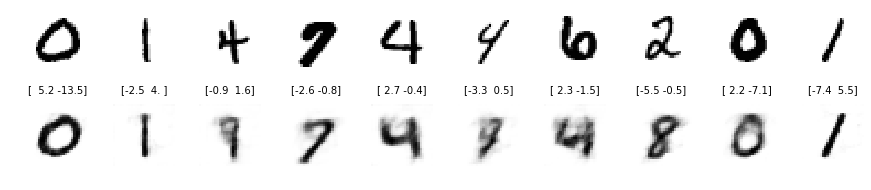

In [19]:
n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = AE.encoder.predict(example_images)

reconst_images = AE.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=ax.transAxes)   
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')


## Mr N. Coder's wall

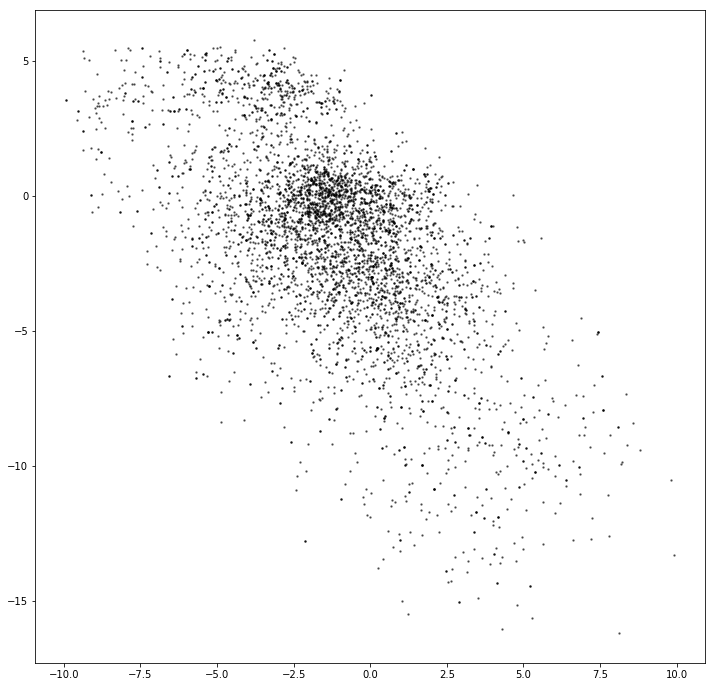

In [20]:
n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show()

## The new generated art exhibition

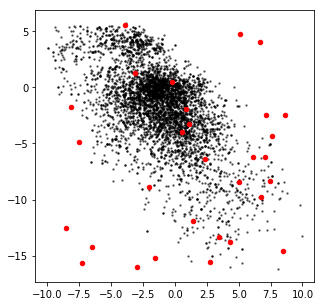

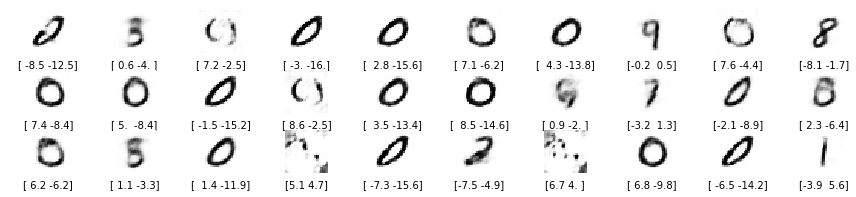

In [21]:
figsize = 5

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

grid_size = 10
grid_depth = 3
figsize = 15

x = np.random.uniform(min_x,max_x, size = grid_size * grid_depth)
y = np.random.uniform(min_y,max_y, size = grid_size * grid_depth)
z_grid = np.array(list(zip(x, y)))
reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

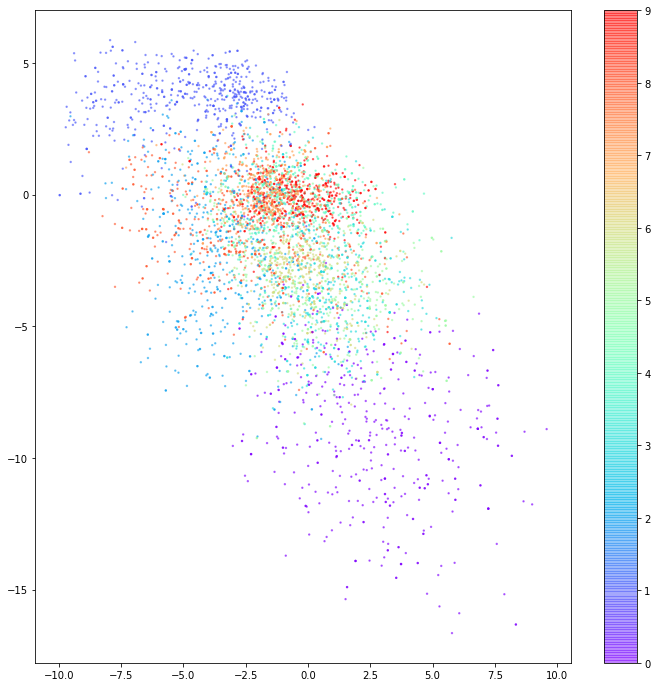

In [22]:
n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()
plt.show()

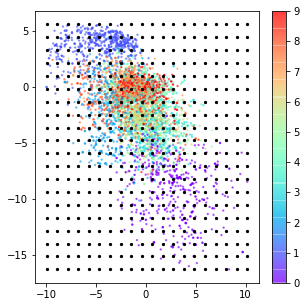

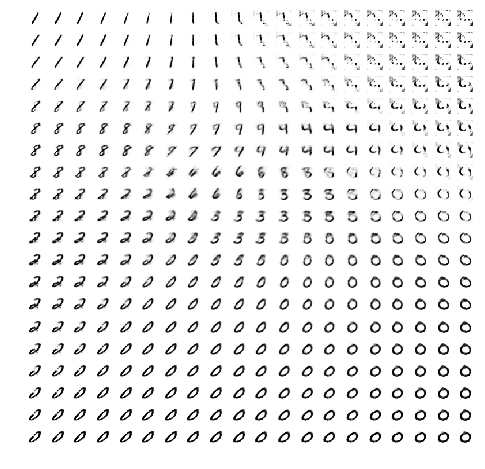

In [23]:
import numpy as np
n_to_show = 5000
grid_size = 20
figsize = 8

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

plt.figure(figsize=(5, 5))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

# x = norm.ppf(np.linspace(0.05, 0.95, 10))
# y = norm.ppf(np.linspace(0.05, 0.95, 10))
x = np.linspace(min(z_points[:, 0]), max(z_points[:, 0]), grid_size)
y = np.linspace(max(z_points[:, 1]), min(z_points[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=5)




plt.show()


fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

# VAE Training

In [24]:
import os

from models.VAE import VariationalAutoencoder
from utils.loaders import load_mnist

In [25]:
# run params
SECTION = 'vae'
RUN_ID = '0002'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

In [26]:
(x_train, y_train), (x_test, y_test) = load_mnist()

In [27]:
vae = VariationalAutoencoder(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 2
)

if mode == 'build':
    vae.save(RUN_FOLDER)
else:
    vae.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [28]:
vae.encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
encoder_conv_0 (Conv2D)         (None, 28, 28, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
leaky_re_lu_8 (LeakyReLU)       (None, 28, 28, 32)   0           encoder_conv_0[0][0]             
__________________________________________________________________________________________________
encoder_conv_1 (Conv2D)         (None, 14, 14, 64)   18496       leaky_re_lu_8[0][0]              
__________________________________________________________________________________________________
leaky_re_l

In [29]:
vae.decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 14, 14, 64)        0         
__________

In [30]:
LEARNING_RATE = 0.0005
R_LOSS_FACTOR = 1000

In [31]:
vae.compile(LEARNING_RATE, R_LOSS_FACTOR)

In [32]:
BATCH_SIZE = 32
EPOCHS = 200
PRINT_EVERY_N_BATCHES = 100
INITIAL_EPOCH = 0

In [33]:
vae.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , initial_epoch = INITIAL_EPOCH
)

Epoch 1/200
  128/60000 [..............................] - ETA: 22:34 - loss: 230.2007 - vae_r_loss: 230.1999 - vae_kl_loss: 7.6447e-04

C:\Users\ankit19.gupta\ankit\ankit\ML_Code\GenerativeDeepLearning\myenv\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127994). Check your callbacks.
  % delta_t_median)


60000/60000 [==============================] - 123s 2ms/step - loss: 58.3671 - vae_r_loss: 55.1097 - vae_kl_loss: 3.2574

Epoch 00001: saving model to run/vae/0002_digits\weights/weights-001-58.37.h5

Epoch 00001: saving model to run/vae/0002_digits\weights/weights.h5
Epoch 2/200
60000/60000 [==============================] - 153s 3ms/step - loss: 51.7085 - vae_r_loss: 47.7552 - vae_kl_loss: 3.9534

Epoch 00002: saving model to run/vae/0002_digits\weights/weights-002-51.71.h5

Epoch 00002: saving model to run/vae/0002_digits\weights/weights.h5
Epoch 3/200
59648/60000 [============================>.] - ETA: 0s - loss: 50.0675 - vae_r_loss: 45.7718 - vae_kl_loss: 4.2957

KeyboardInterrupt: 

## VAE Analysis

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm

from models.VAE import VariationalAutoencoder
from utils.loaders import load_mnist, load_model

In [35]:
# run params
SECTION = 'vae'
RUN_ID = '0002'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

In [36]:
(x_train, y_train), (x_test, y_test) = load_mnist()

In [37]:
vae = load_model(VariationalAutoencoder, RUN_FOLDER)

## reconstructing original paintings

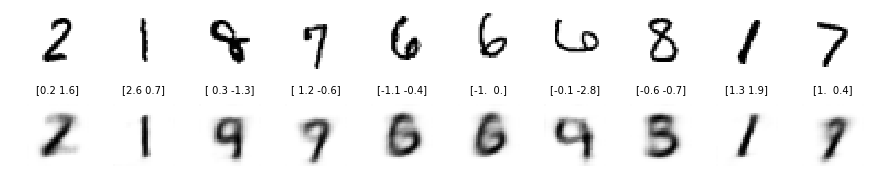

In [38]:
n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = vae.encoder.predict(example_images)

reconst_images = vae.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')
    sub.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=sub.transAxes)
            
    sub.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img, cmap='gray_r')


## Mr N. Coder's wall

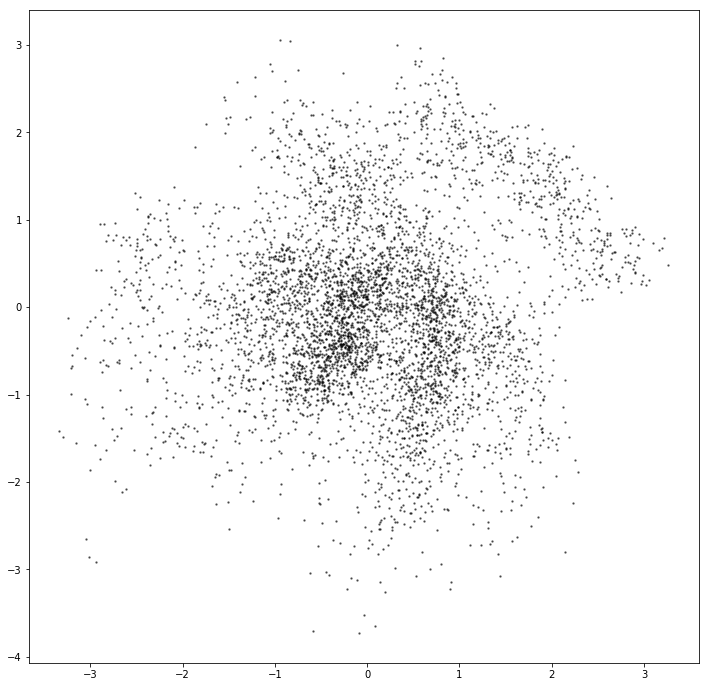

In [39]:
n_to_show = 5000
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show()

## The new generated art exhibition

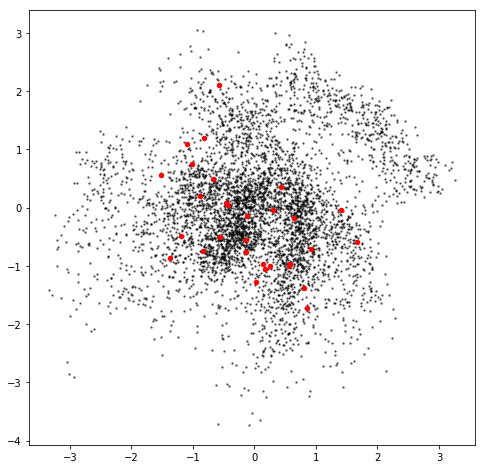

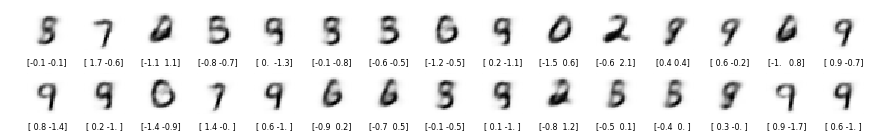

In [40]:
figsize = 8
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)


grid_size = 15
grid_depth = 2
figsize = 15

x = np.random.normal(size = grid_size * grid_depth)
y = np.random.normal(size = grid_size * grid_depth)

z_grid = np.array(list(zip(x, y)))
reconst = vae.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=8, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

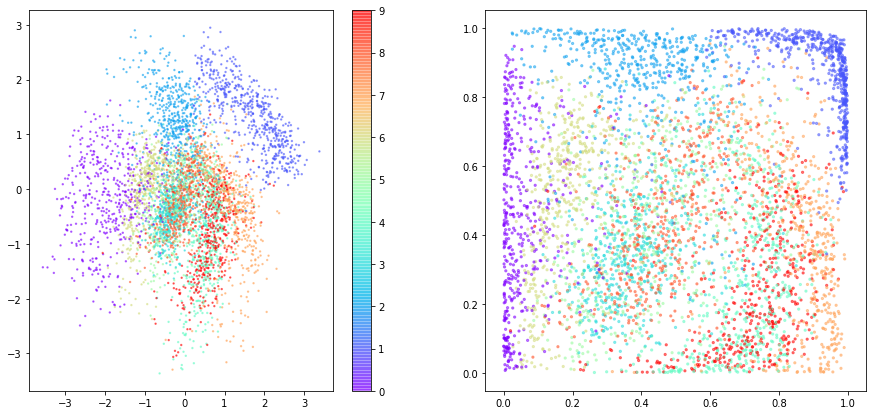

In [41]:
n_to_show = 5000
grid_size = 15
fig_height = 7
fig_width = 15

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)
p_points = norm.cdf(z_points)

fig = plt.figure(figsize=(fig_width, fig_height))

ax = fig.add_subplot(1, 2, 1)
plot_1 = ax.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar(plot_1)

ax = fig.add_subplot(1, 2, 2)
plot_2 = ax.scatter(p_points[:, 0] , p_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=5)



plt.show()

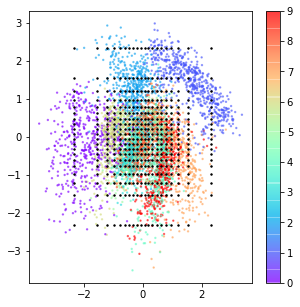

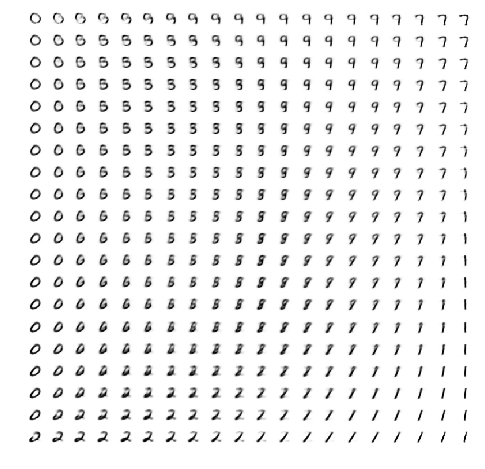

In [42]:
n_to_show = 5000
grid_size = 20
figsize = 8

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)

plt.figure(figsize=(5, 5))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

x = norm.ppf(np.linspace(0.01, 0.99, grid_size))
y = norm.ppf(np.linspace(0.01, 0.99, grid_size))
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = vae.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=2)




plt.show()


fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

## VAE Training - Faces dataset

In [43]:
import os
from glob import glob
import numpy as np

from models.VAE import VariationalAutoencoder
from keras.preprocessing.image import ImageDataGenerator


In [47]:
# run params
section = 'vae'
run_id = '0001'
data_name = 'faces'
RUN_FOLDER = 'run/{}/'.format(section)
RUN_FOLDER += '_'.join([run_id, data_name])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #


DATA_FOLDER = './data1/processed-celeba-small/processed_celeba_small/'

In [48]:
INPUT_DIM = (128,128,3)
BATCH_SIZE = 32

filenames = np.array(glob(os.path.join(DATA_FOLDER, '*/*.jpg')))

NUM_IMAGES = len(filenames)

In [50]:
data_gen = ImageDataGenerator(rescale=1./255)

data_flow = data_gen.flow_from_directory(DATA_FOLDER
                                         , target_size = INPUT_DIM[:2]
                                         , batch_size = BATCH_SIZE
                                         , shuffle = True
                                         , class_mode = 'input'
                                         , subset = "training"
                                            )

Found 89931 images belonging to 1 classes.


In [51]:
vae = VariationalAutoencoder(
                input_dim = INPUT_DIM
                , encoder_conv_filters=[32,64,64, 64]
                , encoder_conv_kernel_size=[3,3,3,3]
                , encoder_conv_strides=[2,2,2,2]
                , decoder_conv_t_filters=[64,64,32,3]
                , decoder_conv_t_kernel_size=[3,3,3,3]
                , decoder_conv_t_strides=[2,2,2,2]
                , z_dim=200
                , use_batch_norm=True
                , use_dropout=True)

if mode == 'build':
    vae.save(RUN_FOLDER)
else:
    vae.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

W0529 22:25:26.791598 18620 deprecation_wrapper.py:119] From C:\Users\ankit19.gupta\ankit\ankit\ML_Code\GenerativeDeepLearning\myenv\lib\site-packages\keras\backend\tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0529 22:25:27.515551 18620 deprecation.py:506] From C:\Users\ankit19.gupta\ankit\ankit\ML_Code\GenerativeDeepLearning\myenv\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [52]:
vae.encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
encoder_conv_0 (Conv2D)         (None, 64, 64, 32)   896         encoder_input[0][0]              
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 32)   128         encoder_conv_0[0][0]             
__________________________________________________________________________________________________
leaky_re_lu_22 (LeakyReLU)      (None, 64, 64, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
dropout_1 

In [53]:
vae.decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              823296    
_________________________________________________________________
reshape_4 (Reshape)          (None, 8, 8, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 16, 16, 64)        36928     
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
__________

In [54]:
LEARNING_RATE = 0.0005
R_LOSS_FACTOR = 10000
EPOCHS = 200
PRINT_EVERY_N_BATCHES = 100
INITIAL_EPOCH = 0

In [55]:
vae.compile(LEARNING_RATE, R_LOSS_FACTOR)

In [56]:
vae.train_with_generator(     
    data_flow
    , epochs = EPOCHS
    , steps_per_epoch = NUM_IMAGES / BATCH_SIZE
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , initial_epoch = INITIAL_EPOCH
)

Epoch 1/200
 139/1018 [===>..........................] - ETA: 23:59 - loss: 522.4259 - vae_r_loss: 431.8166 - vae_kl_loss: 90.6093

KeyboardInterrupt: 